<a href="https://colab.research.google.com/github/amityadav108/PROJECT-Resume-Screening-System/blob/main/PROJECT_%E2%80%94_Resume_Screening_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI-Powered Resume Classification, Skill Extraction & ATS Scoring System

This project is a complete end-to-end Machine Learning + NLP application built using Python.
It uses your real dataset (ResumeDataSet.csv), applies text processing, trains a classification model, extracts relevant skills, evaluates ATS scores, and ranks resumes based on job descriptions.

## Project Highlights

This project includes ALL major ML/NLP features in one notebook:
1. Resume Classification (using Logistic Regression)
Predicts job category based on resume content.

2. Skill Extraction (Custom NLP Rule-Based System)
Auto-detects skills like Python, SQL, ML, TensorFlow, etc.

3. Resume Ranking Using Cosine Similarity
Matches resumes with a job description.

4. ATS Score Generator
Scores how well a resume fits a job description (0–100).

5. Clean, beginner-friendly code with explanations
Every step is simplified for easy understanding.

### PART 1 - IMPORT REQUIRED LIBRARIES

In [ ]:
# Data handling
import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Machine Learning tools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# For Model Evaluation
from sklearn.metrics import accuracy_score, classification_report

# For Ranking resumes
from sklearn.metrics.pairwise import cosine_similarity

### PART - 2 LOAD DATASET

In [ ]:
# To read your CSV file that you uploaded.

df = pd.read_csv("ResumeDataSet.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


### PART - 3 CHECK DATA INFORMATION

In [ ]:
# To understand the size, column names, and missing values.

print(df.shape)
print(df.columns)
print(df.isnull().sum())

(962, 2)
Index(['Category', 'Resume'], dtype='object')
Category    0
Resume      0
dtype: int64


### PART - 4 SHOW CATEGORY COUNTS

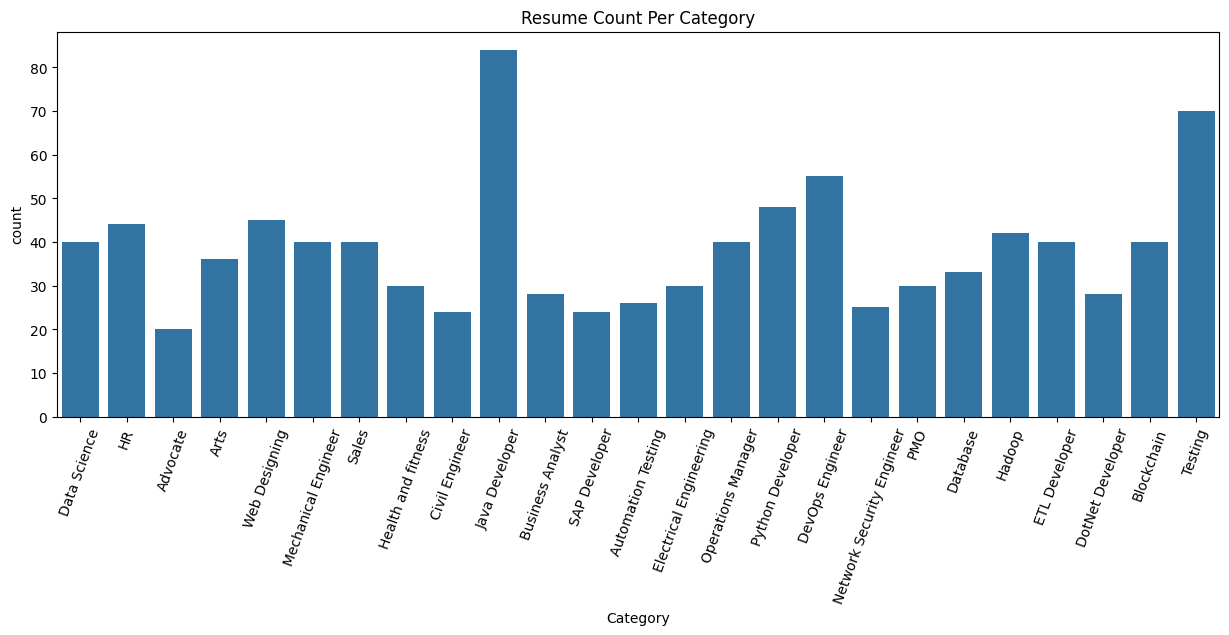

In [ ]:
# To check how many resumes are in each job category.

plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Category')
plt.xticks(rotation=70)
plt.title("Resume Count Per Category")
plt.show()

### PART - 5 TEXT CLEANING

In [ ]:
# ML models prefer clean and uniform text.
df['Resume'] = df['Resume'].str.lower()
df.head()

,Category,Resume
0,Data Science,skills * programming languages: python (pandas...
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...
2,Data Science,"areas of interest deep learning, control syste..."
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...
4,Data Science,"education details \r\n mca ymcaust, faridab..."


### PART - 6 SPLIT DATA INTO TRAIN + TEST

In [ ]:
# The model learns from training data and is tested separately.

X = df['Resume']        # Resume text
y = df['Category']      # Category text

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### PART - 7 TF-IDF VECTOR(Text-to-Numbers)

In [ ]:
# Machines cannot read text, so TF-IDF converts words into numbers

tfidf = TfidfVectorizer(stop_words="english", max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

### PART - 8 TRAIN LOGISTIC REGRESSION MODEL

In [ ]:
# This is resume classifier

model = LogisticRegression(max_iter = 2000)
model.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


### PART - 9 MODEL PREDICTION

In [ ]:
y_pred = model.predict(X_test_tfidf)

### PART - 10 MODEL ACCURACY

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9948186528497409

### PART - 11 CLASSIFICATION REPORT

In [ ]:
print(classification_report(y_test, y_pred))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
                   Hadoop       1.00      1.00      1.00     

### PART - 12 SKILL EXTRACTION FEATURE

#### STEP - 1 Create Skill List

In [ ]:
# We check resumes for these skills

skill_keywords = [
    "python", "java", "c++", "sql", "mysql","mongodb",
    "machine learning","deep learning","nlp","natural language processing",
    "tensorflow", "keras","pytorch","scikit-learn","pandas","numpy",
    "matplotlib","seaborn", "power bi","tableau", "excel", "html","css",
    "javscript", "react", "git", "github", "linux", "docker", "aws",
    "azure","data analysis", "data visualization", "data miniing"
]

#### STEP - 2 Extract Skills Function

In [ ]:
# To find skills present in each resume.

def extract_skills(text):
    text = text.lower()
    found = []

    for skill in skill_keywords:
        if skill in text:
            found.append(skill)

    return found

#### STEP - 3 Apply Skill Extraction

In [ ]:
df["Extracted_Skills"] = df["Resume"].apply(extract_skills)
df.head()

,Category,Resume,Extracted_Skills
0,Data Science,skills * programming languages: python (pandas...,"[python, java, sql, mysql, machine learning, d..."
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...,"[python, machine learning, keras, git, github,..."
2,Data Science,"areas of interest deep learning, control syste...","[python, java, sql, mysql, machine learning, d..."
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,"[python, sql, machine learning, deep learning,..."
4,Data Science,"education details \r\n mca ymcaust, faridab...","[python, java, data analysis]"


#### STEP - 4 Visualize Popular Skills

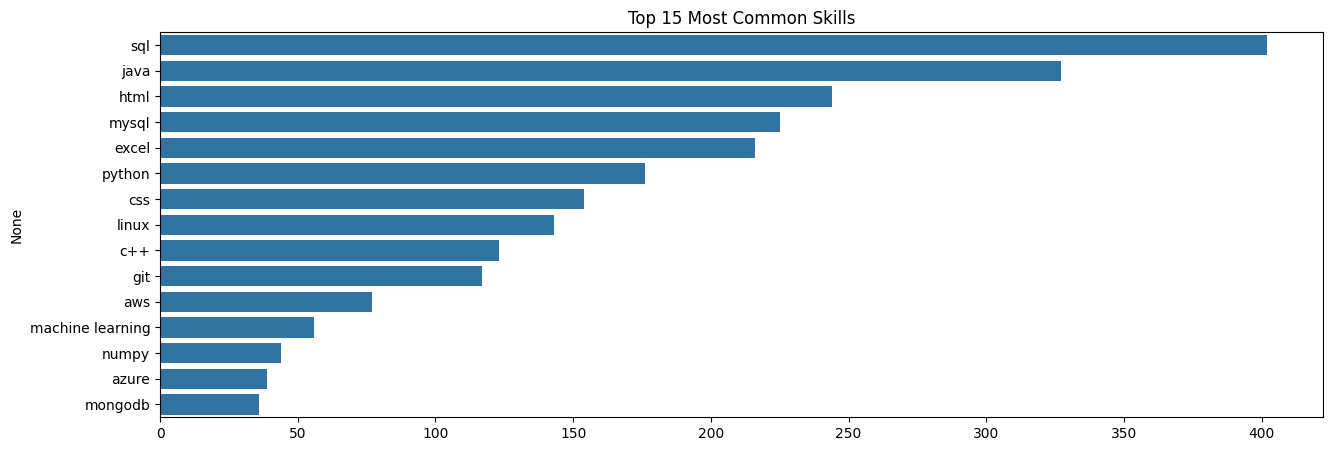

In [ ]:
all_skills = sum(df["Extracted_Skills"], [])
skill_counts = pd.Series(all_skills).value_counts().head(15)

plt.figure(figsize=(15,5))
sns.barplot(y=skill_counts.index, x=skill_counts.values)
plt.title("Top 15 Most Common Skills")
plt.show()

### PART - 13 RESUME RANKING SYSTEM (MATCHING TO JOB DESCRIPTION)

#### STEP - 1 Enter a Job Description

In [ ]:
job_description = """
We are looking for a Machine Learning Engineer skilled in Python, TensorFlow, data analysis,
deep learning, and model deployment.
"""

#### STEP - 2 Convert JD to TF-IDF

In [ ]:
jd_tfidf = tfidf.transform([job_description])

#### STEP - 3 Compute Similarity Scores

In [ ]:
resume_tfidf = tfidf.transform(df["Resume"])
similarity_scores = cosine_similarity(jd_tfidf, resume_tfidf).flatten()

#### STEP - 4 Add Ranking to Dataset

In [ ]:
df["Match_Score"] = similarity_scores

#### STEP - 5 Show Top 5 Best Matching Resumes

In [ ]:
df.sort_values("Match_Score", ascending=False).head()

,Category,Resume,Extracted_Skills,Match_Score
7,Data Science,education details \r\n b.tech rayat and bahr...,"[python, java, c++, sql, mysql, machine learni...",0.418942
37,Data Science,education details \r\n b.tech rayat and bahr...,"[python, java, c++, sql, mysql, machine learni...",0.418942
17,Data Science,education details \r\n b.tech rayat and bahr...,"[python, java, c++, sql, mysql, machine learni...",0.418942
27,Data Science,education details \r\n b.tech rayat and bahr...,"[python, java, c++, sql, mysql, machine learni...",0.418942
8,Data Science,personal skills â¢ ability to quickly grasp t...,"[python, sql, mysql, machine learning, deep le...",0.303372


### PART - 14 ATS SCORE FEATURE

#### STEP - 1 Simple ATS Score Formula

ATS Score Uses :
* Skill Match
* Keyword Match
* Resume length

In [ ]:
def ats_score(resume, job_desc):
    resume = resume.lower()
    job_desc = job_desc.lower()

    score = 0

    # 1. Skill Match (40%)
    skill_match = sum(1 for skill in skill_keywords if skill in resume and skill in job_desc)
    score += skill_match*4

    # 2. Keyword Match(40%)
    jd_words = job_desc.split()
    resume_words = resume.split()
    word_match = len(set(jd_words) & set(resume_words))
    score += min(word_match, 10)*4

    # 3. Length Score (20%)
    if 100 < len(resume.split()) <500:
        score +=20

    return min(score, 100)

#### STEP - 2 Apply ATS Score

In [ ]:
df["ATS_Score"] = df["Resume"].apply(lambda x:ats_score(x,job_description))
df.head()

,Category,Resume,Extracted_Skills,Match_Score,ATS_Score
0,Data Science,skills * programming languages: python (pandas...,"[python, java, sql, mysql, machine learning, d...",0.113531,52
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...,"[python, machine learning, keras, git, github,...",0.161715,56
2,Data Science,"areas of interest deep learning, control syste...","[python, java, sql, mysql, machine learning, d...",0.188899,72
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,"[python, sql, machine learning, deep learning,...",0.078399,40
4,Data Science,"education details \r\n mca ymcaust, faridab...","[python, java, data analysis]",0.091077,12


### PART - 15 TEST WITH YOUR OWN RESUME

In [ ]:
my_resume = """
I am fresher in Python, machine learning, deep learning, NLP,
TensorFlow, and model deployment.
"""

my_resume_tfidf = tfidf.transform([my_resume])

print("Predicted Category:", model.predict(my_resume_tfidf)[0])
print("Extracted Skills:", extract_skills(my_resume))
print("Job Match Score:", cosine_similarity(jd_tfidf, my_resume_tfidf)[0][0])
print("ATS Score:", ats_score(my_resume, job_description))


Predicted Category: Data Science
Extracted Skills: ['python', 'machine learning', 'deep learning', 'nlp', 'tensorflow']
Job Match Score: 0.7366685935546923
ATS Score: 52
